# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP (he will teach the Geopanda lecture).
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


In [1]:
#from IPython.display import Image
import numpy as np
import pandas as pd
#Image(filename = "Ridetypes.png")
import pylab as pl
from sklearn.cluster import KMeans

import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mtadata = np.load("MTA_Fare.npy")

In [3]:
mtadata.shape
mtadata.dtype

dtype('int32')

In [4]:
mtadata[0][:][:]

array([[56961, 64703, 68002, ..., 36527, 33929, 36824],
       [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
       [  203,   276,   245, ...,   186,   167,   167],
       ..., 
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [   -1,    -1,    -1, ...,  1121,  1377,   712]], dtype=int32)

In [5]:
len(mtadata[:])

600

In [6]:
mtadata.mean(axis=0)

array([[  1.91574617e+04,   2.08778667e+04,   2.12774833e+04, ...,
          2.19824533e+04,   2.08343650e+04,   2.07663483e+04],
       [  8.83976667e+02,   9.72323333e+02,   9.76761667e+02, ...,
          1.15832667e+03,   1.11681833e+03,   1.13226500e+03],
       [  7.94383333e+01,   8.55783333e+01,   8.58316667e+01, ...,
          9.77216667e+01,   9.39800000e+01,   9.17566667e+01],
       ..., 
       [  9.98333333e+00,   9.96833333e+00,   1.05883333e+01, ...,
          8.76666667e+00,   9.37000000e+00,   1.00766667e+01],
       [  3.66666667e-01,   5.58333333e-01,   5.46666667e-01, ...,
          1.20666667e+00,   1.12166667e+00,   1.13666667e+00],
       [ -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00, ...,
          1.88764167e+03,   2.29877667e+03,   8.91466667e+02]])

In [7]:
mtastation = mtadata.mean(axis=0)


In [8]:
temp = np.sum(mtadata, axis=1)
temp2 = np.mean(temp,axis=0)

In [9]:
# temp2
temp_1 = np.nanmean(temp, axis =0)
temp.shape
temp

array([[126877, 149476, 152382, ...,  78901,  74591,  76833],
       [ 37305,  46463,  49358, ...,    -23,    -23,    -23],
       [  6605,   6880,   7228, ...,   8171,   7907,   6790],
       ..., 
       [   -23,    -23,    -23, ...,    -23,    -23,    -23],
       [   -23,    -23,    -23, ...,    -23,    -23,    -23],
       [   -23,    -23,    -23, ...,    -23,    -23,    -23]])

In [10]:
temp2_mean = np.mean(temp2)

In [11]:
temp2_mean

49630.00268041237

In [12]:
temp = np.sum(mtadata, axis=1)
temp2_std_dev = np.std(temp2)
temp2_std_dev

4973.3905797398465

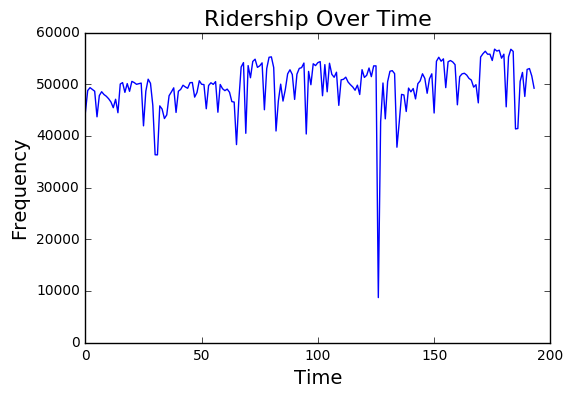

In [13]:
plt.plot(temp2)
plt.title('Ridership Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In [14]:
# print ("std  {:.2f}".format(temp2_std_dev)
thresholds = [np.mean(temp_1) + 3 * temp_1.std(), temp.mean() - 3 * temp_1.std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))

3-sigma thresholds 64550.17 34709.83


In [15]:
temp2.argmin() #http://stackoverflow.com/questions/3499026/find-a-minimum-value-in-an-array-of-floats 
# 126 week is the week it drops the most in the graph above 

126

In [16]:
dates = pd.date_range(start = '06/04/2010', end = '02/14/2014', freq = '7D')

In [17]:
temp = np.nansum(mtadata, axis=1)
temp_1 = np.nanmean(temp, axis =0)

In [18]:
temp_1[(temp_1)<thresholds[1]]

array([ 8692.44333333])

In [19]:
np.where(temp_1<thresholds[1])

(array([126]),)

In [20]:
dates[126]

Timestamp('2012-11-02 00:00:00', offset='7D')

# explain why there is a drop in ridership on 126th week based on the start date of the data frame (5.21.2010)
Based on the data, its on the day that hurricane happened.

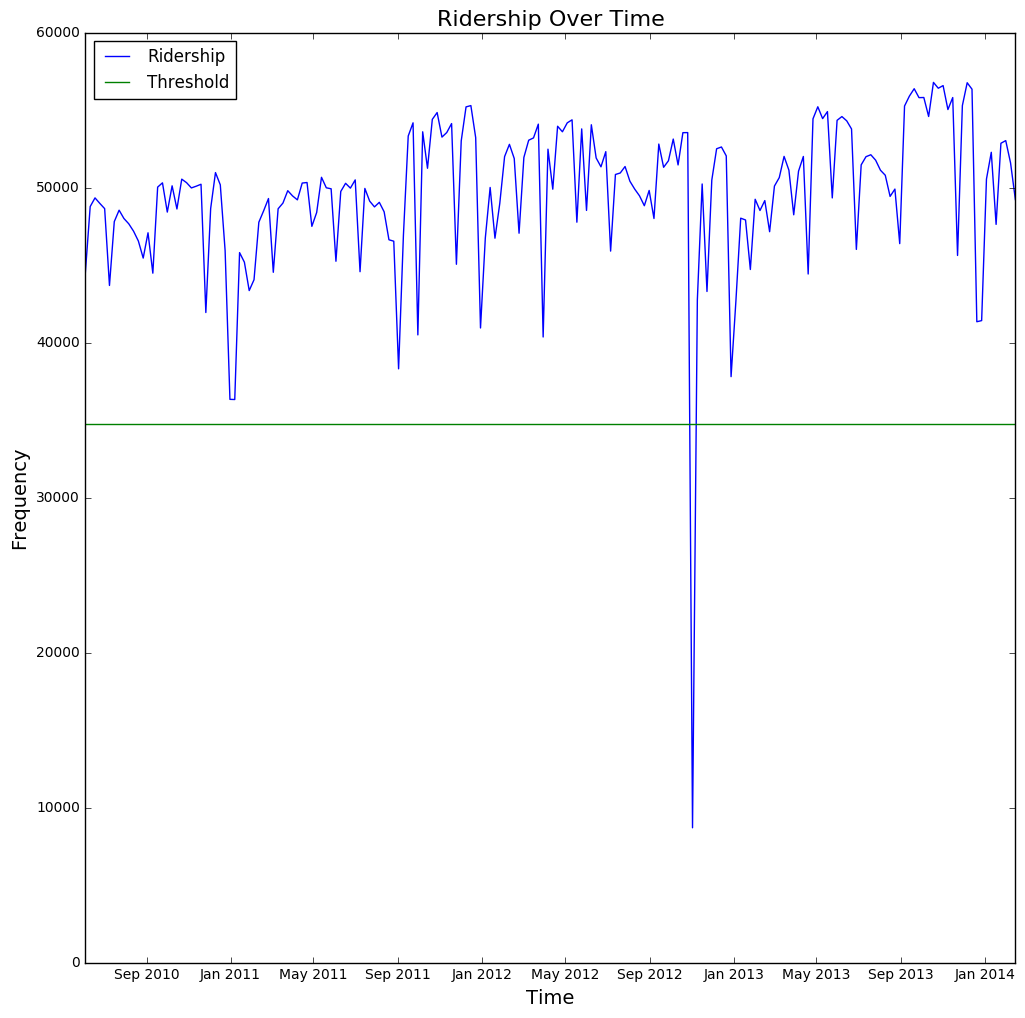

In [21]:
plt.figure(figsize = (12, 12))
plt.plot(dates, temp_1, label = 'Ridership')
plt.plot([plt.xlim()[0], plt.xlim()[1]],[thresholds[1],thresholds[1]], label = 'Threshold')
plt.title('Ridership Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(loc = 'upper left')

Task 2

In [22]:
temp_3 = np.nansum(mtadata, axis=0)
temp_3.shape
temp_3

array([[11494477, 12526720, 12766490, ..., 13189472, 12500619, 12459809],
       [  530386,   583394,   586057, ...,   694996,   670091,   679359],
       [   47663,    51347,    51499, ...,    58633,    56388,    55054],
       ..., 
       [    5990,     5981,     6353, ...,     5260,     5622,     6046],
       [     220,      335,      328, ...,      724,      673,      682],
       [    -600,     -600,     -600, ...,  1132585,  1379266,   534880]])

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


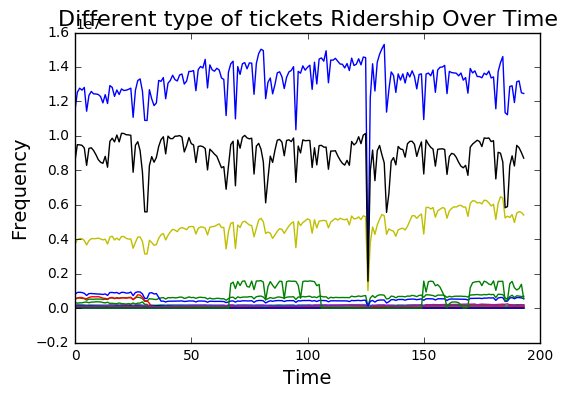

In [23]:
plt.plot(temp_3.T)
plt.title('Different type of tickets Ridership Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(loc = 'upper left')

In [24]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


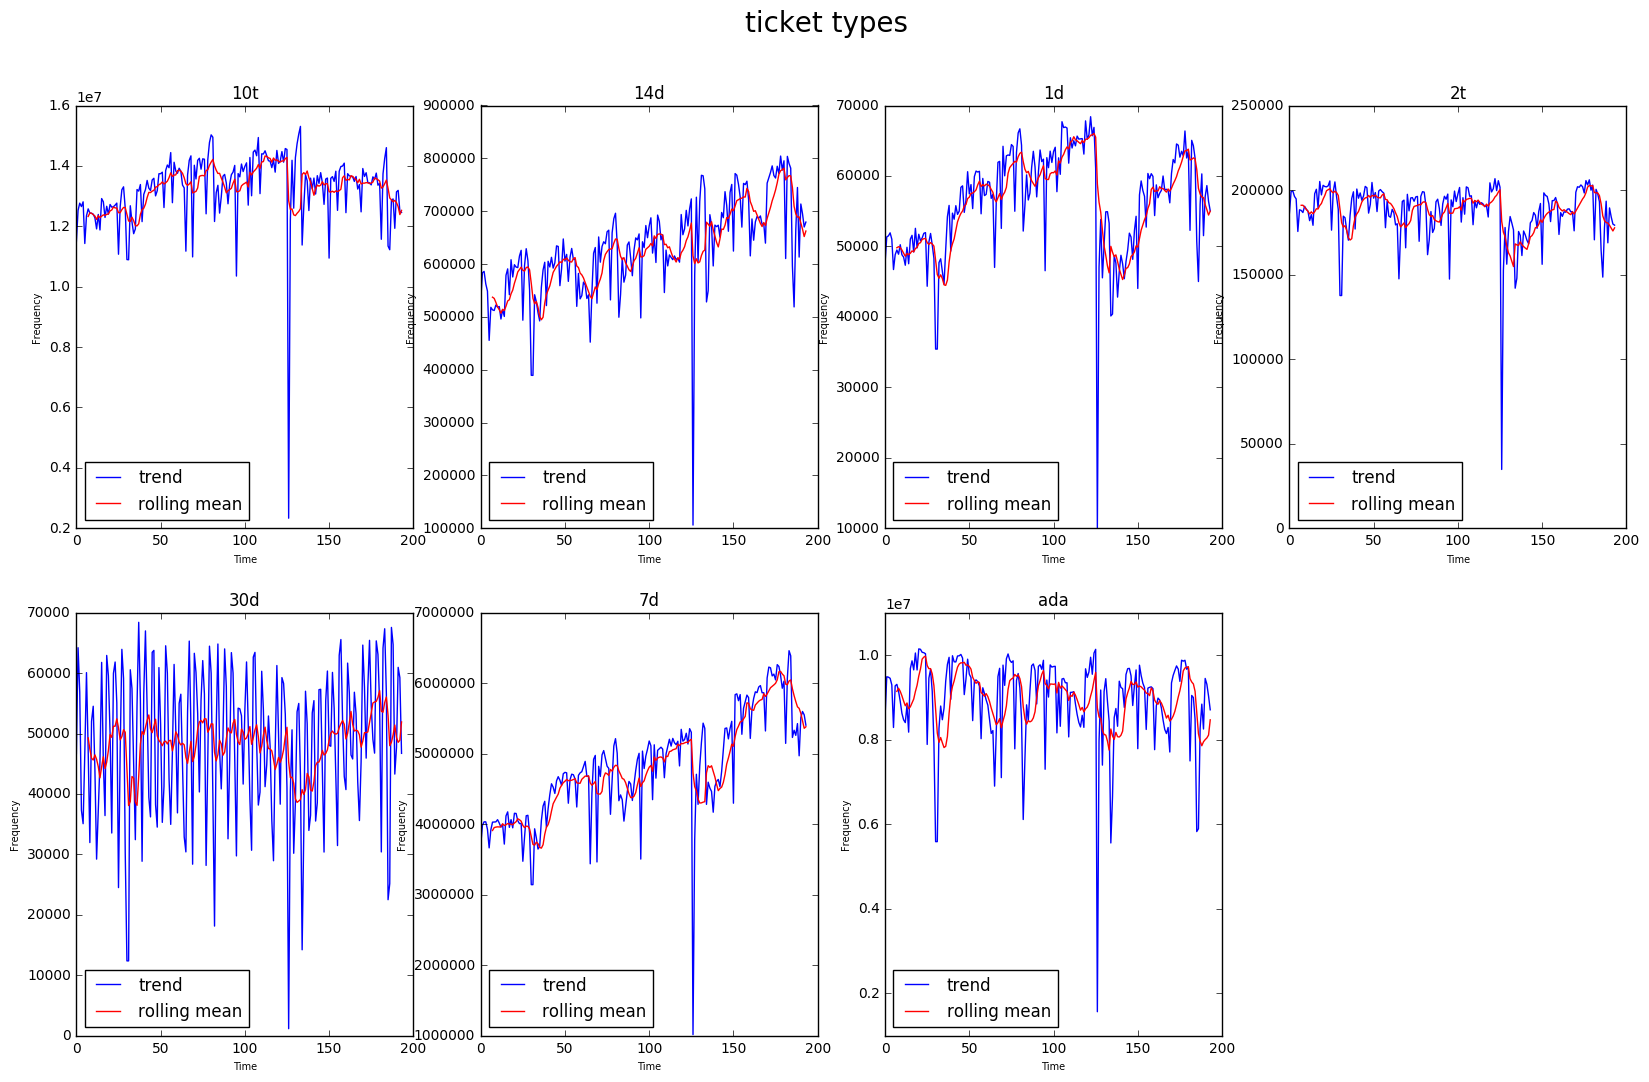

In [25]:
fig1 = plt.figure(figsize = (20,12))
ax1 = [0]*8
ax1[0] = fig1.add_subplot(241)
ax1[1] = fig1.add_subplot(242)
ax1[2] = fig1.add_subplot(243)
ax1[3] = fig1.add_subplot(244)
ax1[4] = fig1.add_subplot(245)
ax1[5] = fig1.add_subplot(246)
ax1[6] = fig1.add_subplot(247)

for i, a in  enumerate(range(0,7)):
    ax1[i].plot((temp_3[a]), label = 'trend')
    ax1[i].plot( pd.rolling_mean(temp_3[a], 8), c= 'red', label = 'rolling mean')
    ax1[i].set_title(ridetype[a])
    ax1[i].set_xlabel('Time', fontsize=7)
    ax1[i].set_ylabel('Frequency', fontsize=7)
    ax1[i].legend(loc = 'lower left')
plt.suptitle('ticket types', fontsize=20)
plt.show()    

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


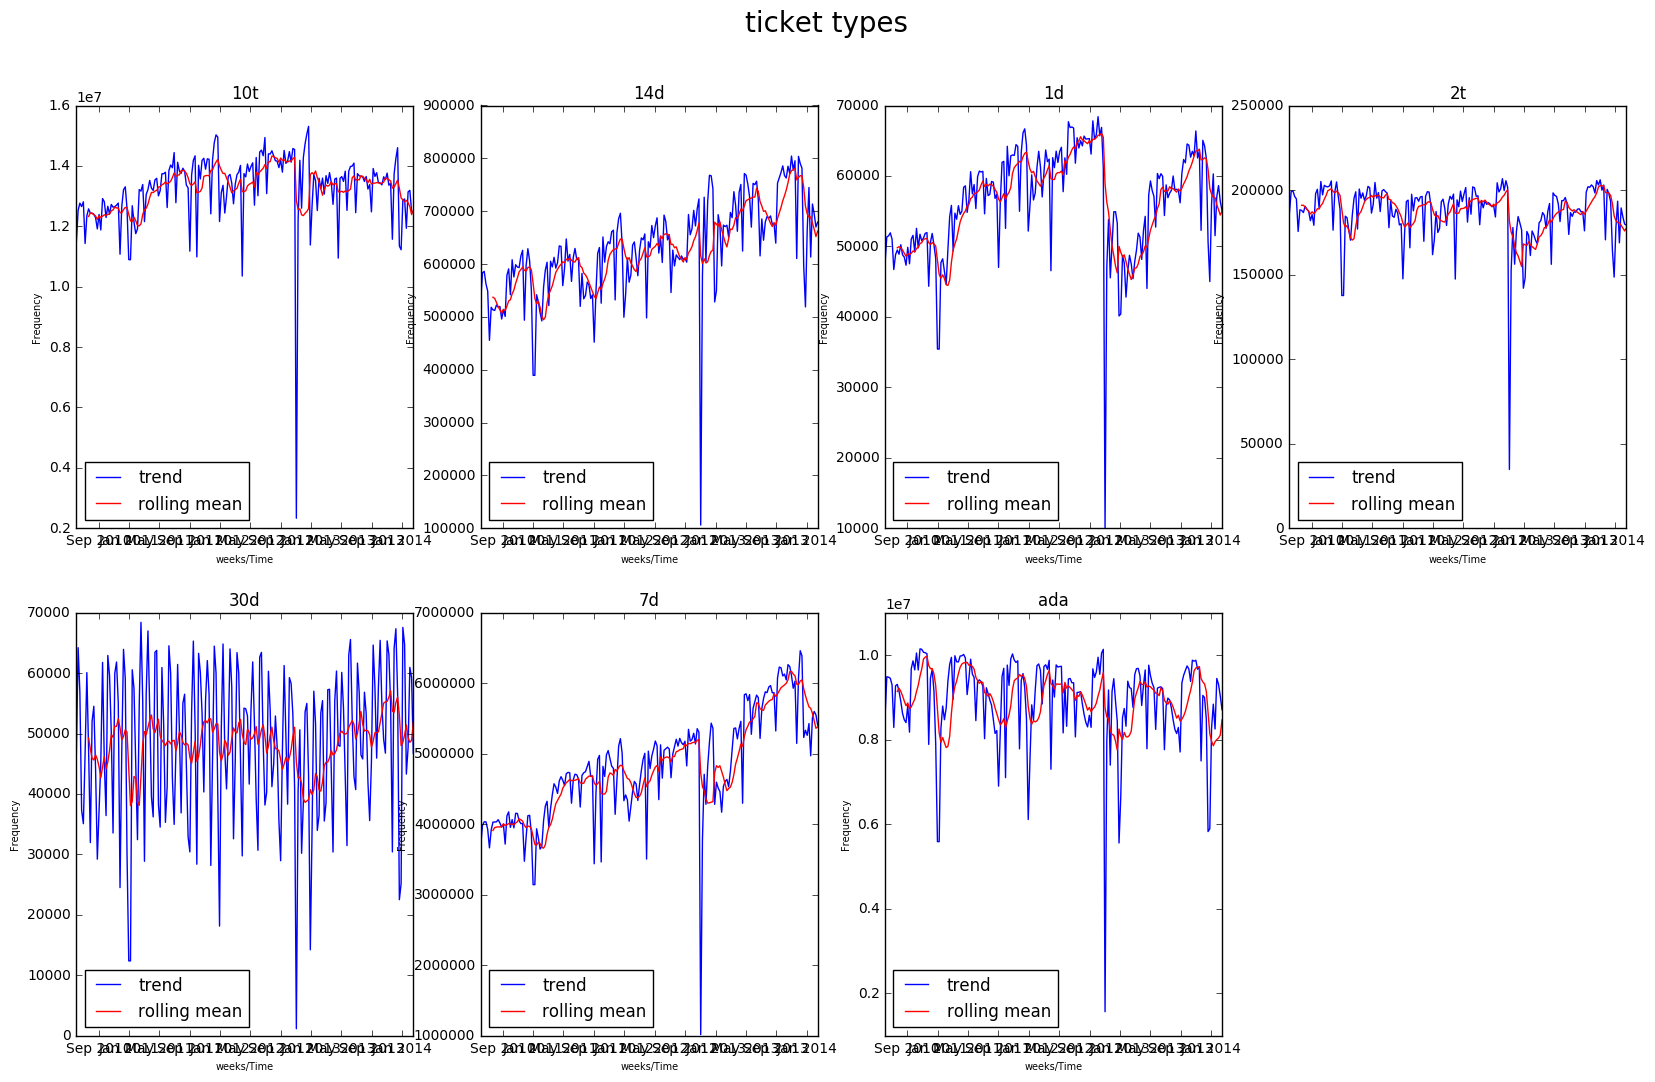

In [26]:
fig2 = plt.figure(figsize = (20,12))
ax2 = [0]*8
ax2[0] = fig2.add_subplot(241)
ax2[1] = fig2.add_subplot(242)
ax2[2] = fig2.add_subplot(243)
ax2[3] = fig2.add_subplot(244)
ax2[4] = fig2.add_subplot(245)
ax2[5] = fig2.add_subplot(246)
ax2[6] = fig2.add_subplot(247)

for i, a in  enumerate(range(0,7)):
    ax2[i].plot(dates,(temp_3[a]), label = 'trend')
    ax2[i].plot( dates, pd.rolling_mean(temp_3[a], 8), c= 'red', label = 'rolling mean')
    ax2[i].set_title(ridetype[a])
    ax2[i].set_xlabel('weeks/Time', fontsize=7)
    ax2[i].set_ylabel('Frequency', fontsize=7)
    ax2[i].legend(loc = 'lower left')
    
plt.suptitle('ticket types', fontsize=20)
plt.show()  

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


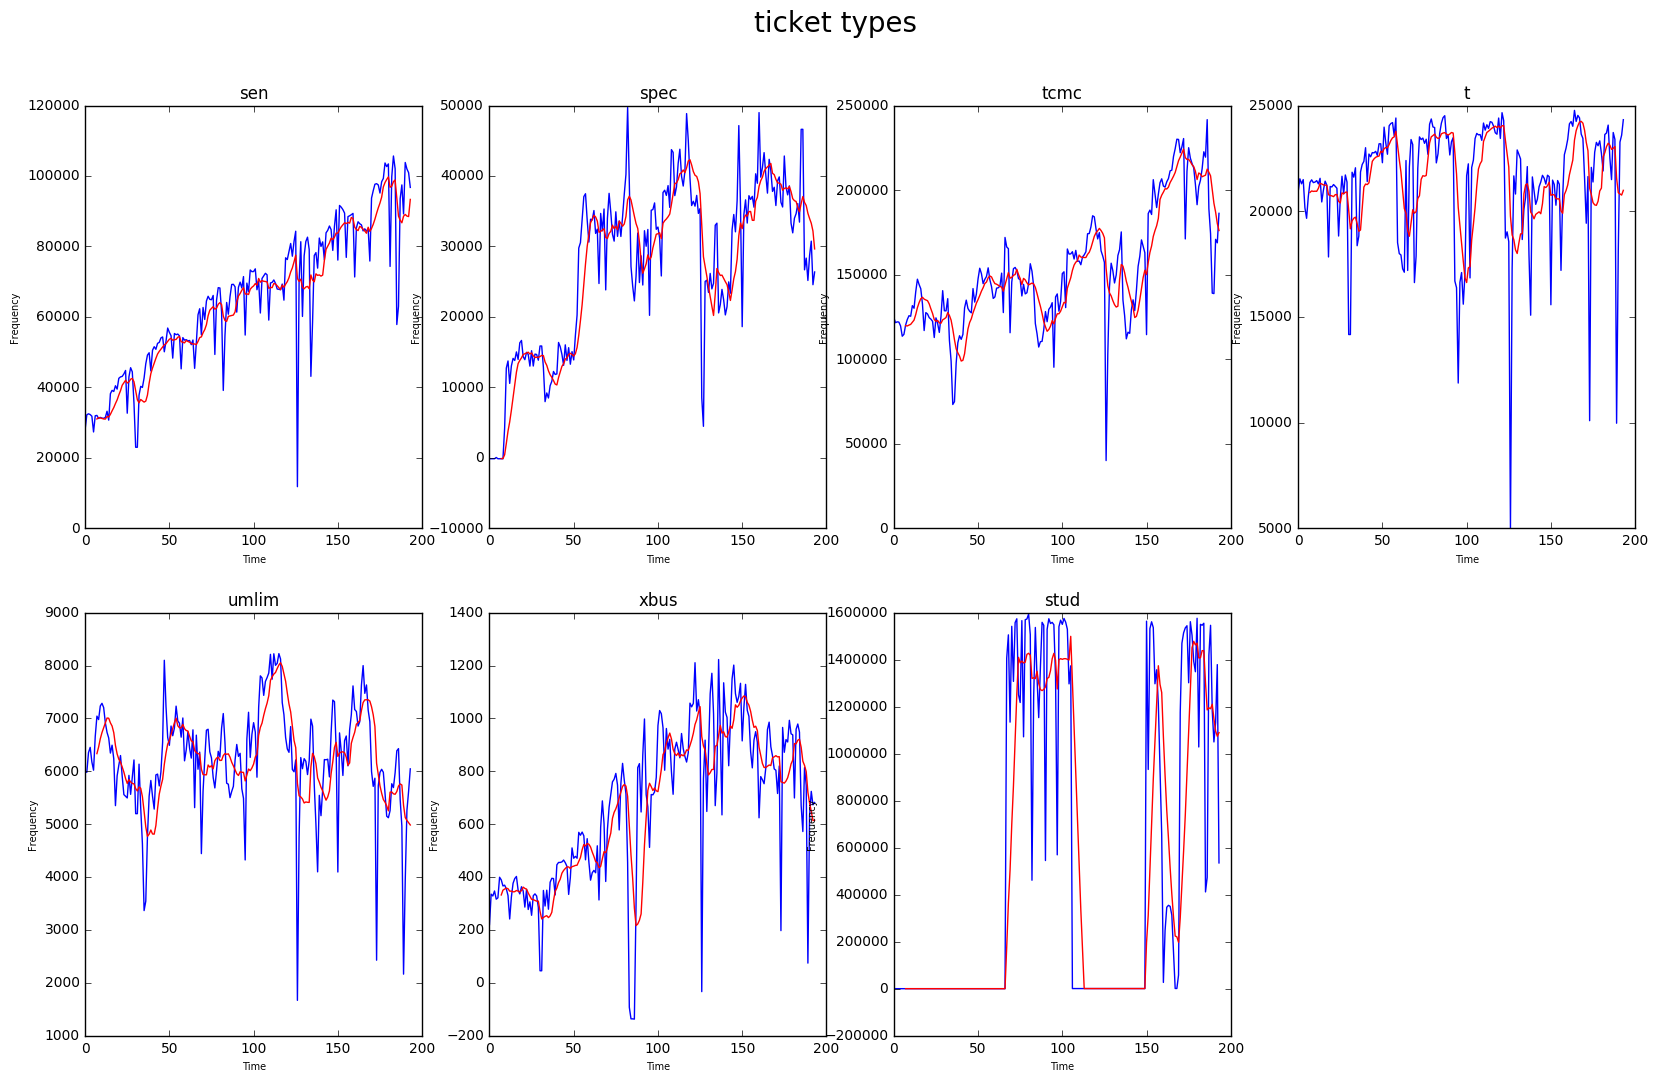

In [27]:
fig3 = plt.figure(figsize = (20,12))
ax3 = [0]*8
ax3[0] = fig3.add_subplot(241)
ax3[1] = fig3.add_subplot(242)
ax3[2] = fig3.add_subplot(243)
ax3[3] = fig3.add_subplot(244)
ax3[4] = fig3.add_subplot(245)
ax3[5] = fig3.add_subplot(246)
ax3[6] = fig3.add_subplot(247)

for i, a in  enumerate(range(16,23)):
    ax3[i].plot((temp_3[a]))
    ax3[i].plot( pd.rolling_mean(temp_3[a], 8), c= 'red')
    ax3[i].set_title(ridetype[a])
    ax3[i].set_xlabel('Time', fontsize=7)
    ax3[i].set_ylabel('Frequency', fontsize=7)
    ax3[i].legend(loc = 'lower left')
plt.suptitle('ticket types', fontsize=20)
plt.show()  

In [28]:
mtacard = np.nansum(mtadata, axis=0)

In [29]:
heads = []
tailes = []
for i in range(23):
    head = np.mean(mtacard [i,:10])
    heads.append(head)
    tail = np.mean(mtacard [i,:-10])
    tailes.append(tail)

In [30]:
tailes

[13276250.652173912,
 625602.99456521741,
 56219.15217391304,
 187567.83695652173,
 48363.75,
 4757937.8152173916,
 8999327.1521739122,
 1849.8695652173913,
 51217.309782608696,
 104671.54891304347,
 21994.82608695652,
 117654.19565217392,
 30754.967391304348,
 109305.08695652174,
 520999.41304347827,
 119470.46195652174,
 63727.994565217392,
 27194.45108695652,
 150394.96739130435,
 21435.135869565216,
 6289.434782608696,
 659.929347826087,
 479385.73913043475]

In [31]:
ratios = []
for i in range(23):
    
    ratio = tailes[i]/heads[i]
    
    print ("for tickettype {}, the trend ratio is {}".format(ridetype[i], ratio))
    ratios.append(ratio)
    

for tickettype 10t, the trend ratio is 1.07524479942
for tickettype 14d, the trend ratio is 1.17321312688
for tickettype 1d, the trend ratio is 1.12976751546
for tickettype 2t, the trend ratio is 0.984658205465
for tickettype 30d, the trend ratio is 1.01139191535
for tickettype 7d, the trend ratio is 1.20938906275
for tickettype ada, the trend ratio is 0.987046043018
for tickettype afas, the trend ratio is 0.170587652753
for tickettype exp, the trend ratio is 0.156454419131
for tickettype ez, the trend ratio is 0.174720048796
for tickettype ff, the trend ratio is 0.534923550854
for tickettype mc, the trend ratio is 0.892994027834
for tickettype mr, the trend ratio is -234.056068427
for tickettype month, the trend ratio is 0.796921292604
for tickettype rfm, the trend ratio is 0.617377542012
for tickettype rr, the trend ratio is 1.85574229337
for tickettype sen, the trend ratio is 2.05101780303
for tickettype spec, the trend ratio is 85.8410703502
for tickettype tcmc, the trend ratio is 

In [32]:
ratios

[1.0752447994193974,
 1.1732131268815997,
 1.1297675154569287,
 0.98465820546516936,
 1.011391915347456,
 1.2093890627547914,
 0.98704604301757626,
 0.17058765275286941,
 0.15645441913050118,
 0.17472004879643835,
 0.53492355085417043,
 0.89299402783380899,
 -234.05606842697372,
 0.79692129260393563,
 0.61737754201161532,
 1.855742293371758,
 2.0510178030348611,
 85.841070350241537,
 1.2457814093316155,
 1.0210173369200204,
 0.96923067645878402,
 1.946694241374888,
 -798.97623188405794]

In [33]:
rddataframe = pd.DataFrame(ratios, columns = ['ratio'])
rddataframe['ticket_type'] = ridetype
rddataframe.head()

ratio ticket_type
0  1.075245         10t
1  1.173213         14d
2  1.129768          1d
3  0.984658          2t
4  1.011392         30d

In [34]:
rddataframe.sort(['ratio'], inplace = True)
rddataframe

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


ratio ticket_type
22 -798.976232        stud
12 -234.056068          mr
8     0.156454         exp
7     0.170588        afas
9     0.174720          ez
10    0.534924          ff
14    0.617378         rfm
13    0.796921       month
11    0.892994          mc
20    0.969231       umlim
3     0.984658          2t
6     0.987046         ada
4     1.011392         30d
19    1.021017           t
0     1.075245         10t
2     1.129768          1d
1     1.173213         14d
5     1.209389          7d
18    1.245781        tcmc
15    1.855742          rr
21    1.946694        xbus
16    2.051018         sen
17   85.841070        spec

In [35]:
stationary = rddataframe[(rddataframe['ratio'] <1.6)&(rddataframe['ratio']>0.8)]
stationary

ratio ticket_type
11  0.892994          mc
20  0.969231       umlim
3   0.984658          2t
6   0.987046         ada
4   1.011392         30d
19  1.021017           t
0   1.075245         10t
2   1.129768          1d
1   1.173213         14d
5   1.209389          7d
18  1.245781        tcmc

In [36]:
upward = rddataframe[(rddataframe['ratio'] >1.5)]
upward

ratio ticket_type
15   1.855742          rr
21   1.946694        xbus
16   2.051018         sen
17  85.841070        spec

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()


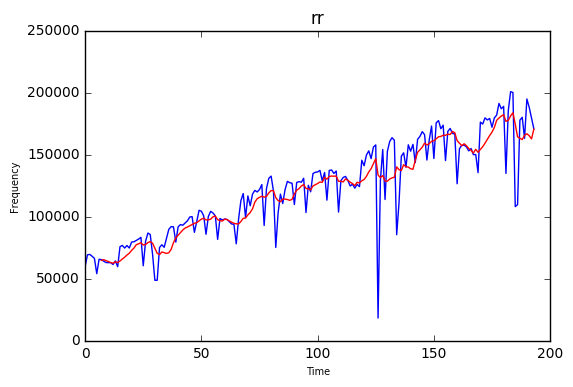

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


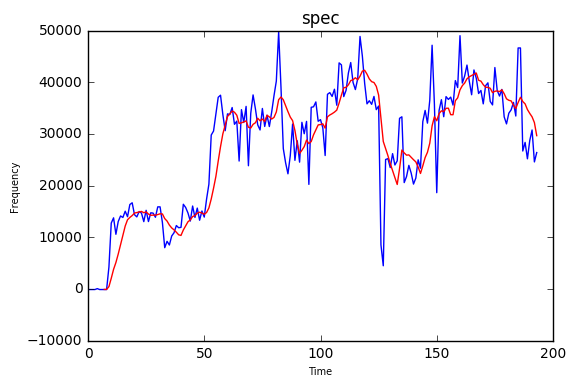

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


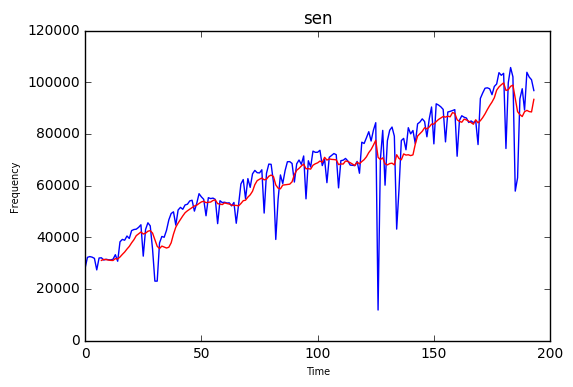

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


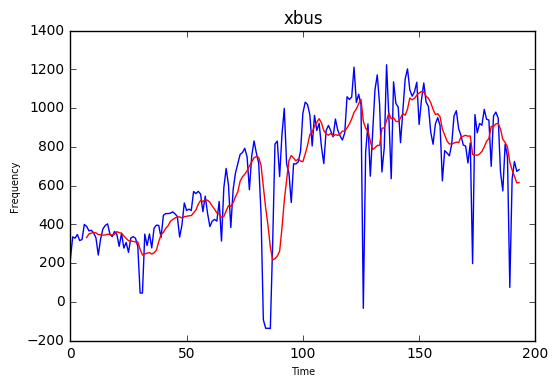

In [37]:

plt.plot((temp_3[15]))
plt.plot( pd.rolling_mean(temp_3[15], 8), c= 'red')
plt.title(ridetype[15])
plt.xlabel('Time', fontsize=7)
plt.ylabel('Frequency', fontsize=7)
plt.legend(loc = 'lower left')
plt.show()
plt.plot((temp_3[17]))
plt.plot( pd.rolling_mean(temp_3[17], 8), c= 'red')
plt.title(ridetype[17])
plt.xlabel('Time', fontsize=7)
plt.ylabel('Frequency', fontsize=7)
plt.legend(loc = 'lower left')
plt.show()
plt.plot((temp_3[16]))
plt.plot( pd.rolling_mean(temp_3[16], 8), c= 'red')
plt.title(ridetype[16])
plt.xlabel('Time', fontsize=7)
plt.ylabel('Frequency', fontsize=7)
plt.legend(loc = 'lower left')
plt.show()
plt.plot((temp_3[21]))
plt.plot( pd.rolling_mean(temp_3[21], 8), c= 'red')
plt.title(ridetype[21])
plt.xlabel('Time', fontsize=7)
plt.ylabel('Frequency', fontsize=7)
plt.legend(loc = 'lower left')
plt.show()

As it is clear "sen" ticket type is the most popular and have the steepest increase.

In [38]:
downward = rddataframe[(rddataframe['ratio'] <=0.8)]
downward

ratio ticket_type
22 -798.976232        stud
12 -234.056068          mr
8     0.156454         exp
7     0.170588        afas
9     0.174720          ez
10    0.534924          ff
14    0.617378         rfm
13    0.796921       month

In [39]:
dates = pd.date_range(start = '06/04/2010', end = '02/14/2014', freq = '7D')


In [40]:
mta_allsum = np.nansum(mtadata, axis=1)
print (mta_allsum.shape)

(600, 194)


(600, 194)


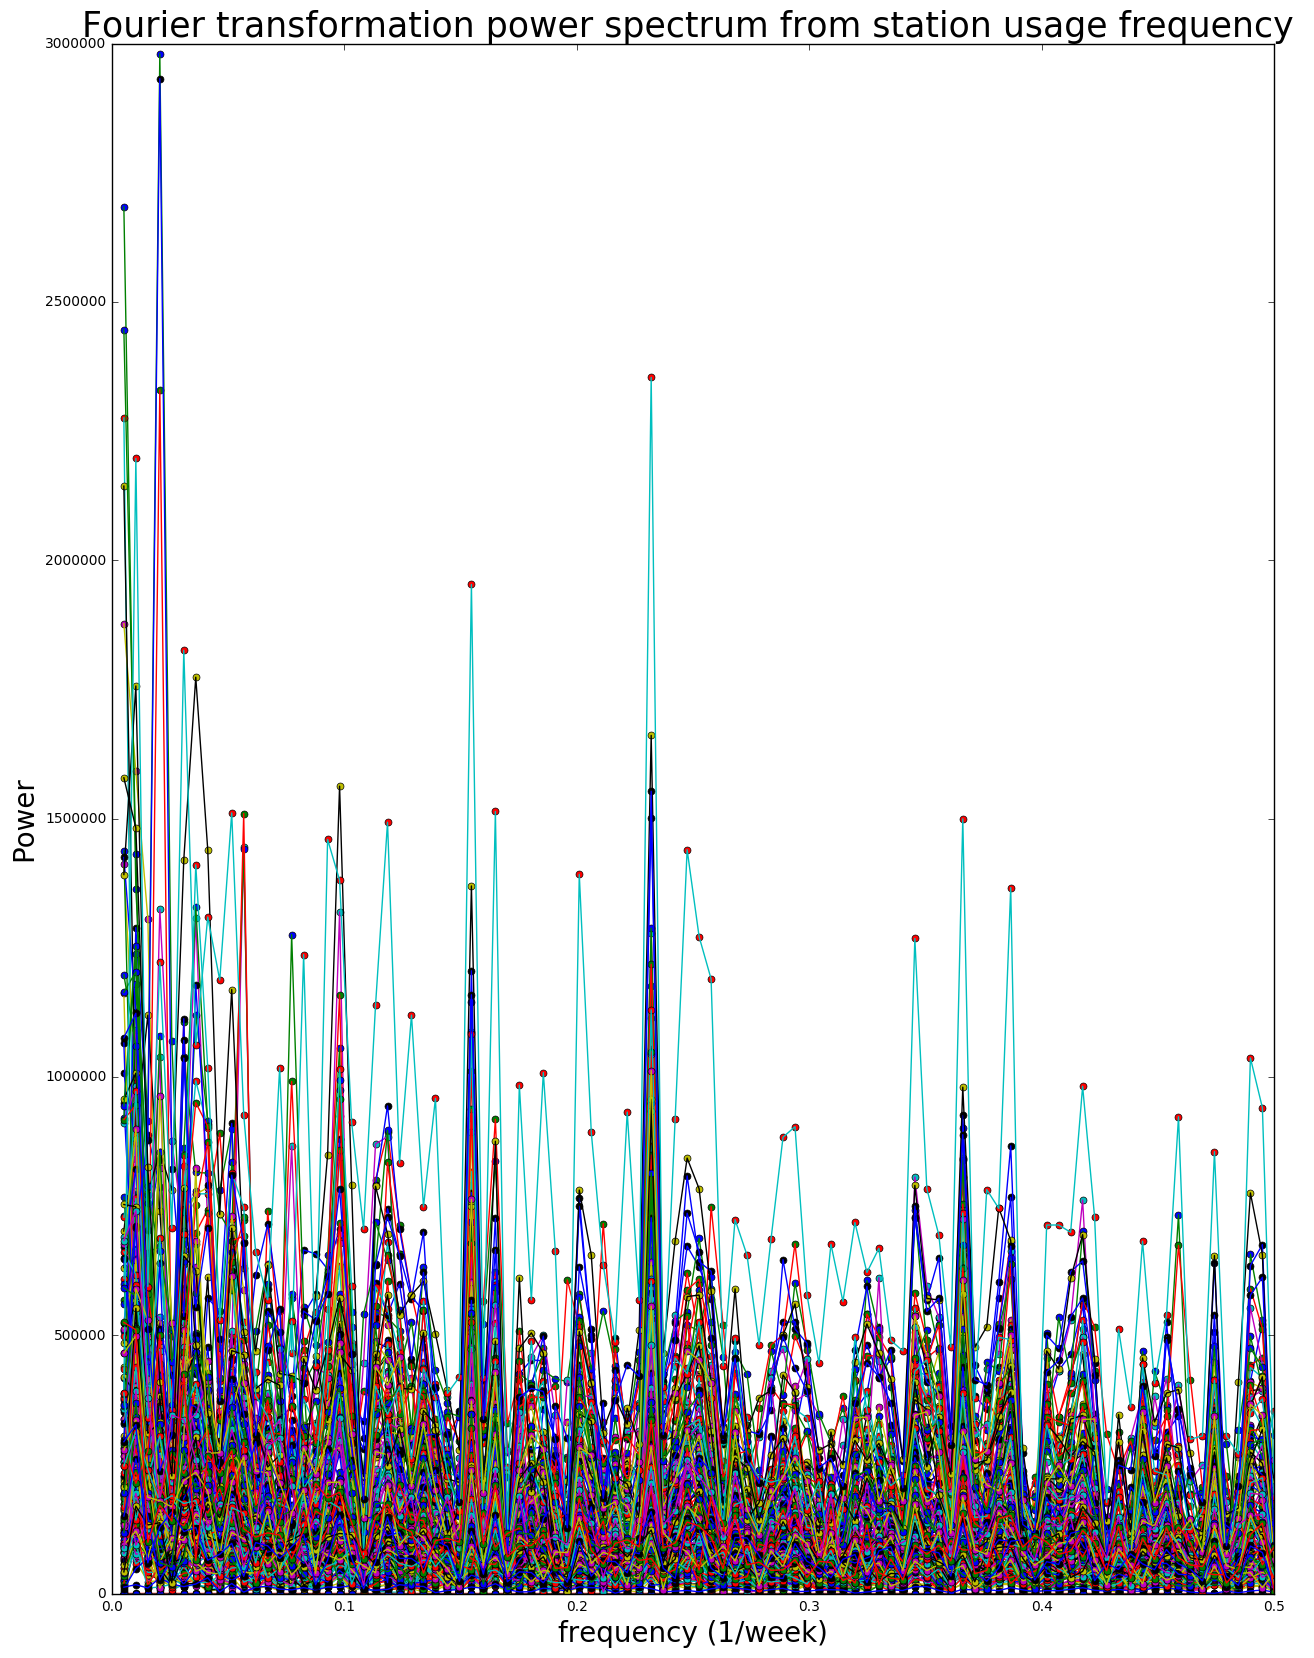

In [41]:
mtadata.shape
mta_allsum = np.nansum(mtadata, axis=1)
print (mta_allsum.shape)
mtastationdataframe = pd.DataFrame(mta_allsum)
mtastationdataframe.head()
mta_allsum.shape
len(np.abs(np.fft.rfft(mta_allsum)))
f =((np.abs(np.fft.rfft(mta_allsum))))
N = len(mta_allsum[0])
period = 1
fig=pl.figure(figsize=(15,20))
ax=fig.add_subplot(111)
for i in range(N):
    ax.plot(np.fft.rfftfreq(N, period)[1:], (f[i][1:]), 'o', ms=5)
    ax.plot(np.fft.rfftfreq(N, period)[1:], (f[i][1:]), '-')
#ax.set_xlim(0,1.0/40)
#ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/week)", fontsize=20)
pl.title('Fourier transformation power spectrum from station usage frequency ', size = 25)


plt.ylabel('Power', fontsize=20)
#plt.legend(loc = 'upper left')

In [42]:
l = 194./52.
l

3.730769230769231

In [43]:
powers = [abs(np.fft.rfft(mta_allsum[i]))[4] for i in range(600)]
powers

[2980184.9113423442,
 518052.39463379199,
 24766.588805679788,
 88399.298803803089,
 52471.149550880131,
 71078.599984785411,
 27457.618656873081,
 62096.351053741382,
 41076.412889025865,
 308554.89726870978,
 390092.81579596124,
 282569.26832877507,
 145507.33203869656,
 828721.15324432775,
 139361.6814317464,
 36962.533743964887,
 278583.63304407662,
 787632.2595923139,
 138571.27983650251,
 1324555.1996205971,
 523463.42516128533,
 419685.30894450593,
 463310.25003506418,
 290703.60412874486,
 183480.81615472832,
 67.646403668310896,
 534378.80094255996,
 739707.38503854384,
 672409.93014647032,
 310677.18423423287,
 283364.39583320898,
 345890.01351988909,
 2329885.7332293335,
 17293.759527748047,
 130905.56913611984,
 133027.37519173967,
 107485.62849179874,
 27163.829259700444,
 186590.03700583123,
 90504.37659605009,
 255668.36800445741,
 370038.69811670418,
 172537.11505087657,
 638980.24123368028,
 507098.61641575873,
 838326.64867515175,
 444716.03270551085,
 230862.99878539

In [44]:
powers_top = sorted(powers, reverse = True)[:4]

stationindex = np.where(np.in1d(powers, powers_top))

print('The stations with maximum annual periodic behavior are {}, {}, {}, and {}.'.\
      format(stationindex[0][0], stationindex[0][1], stationindex[0][2], stationindex[0][3]))

The stations with maximum annual periodic behavior are 0, 150, 194, and 327.


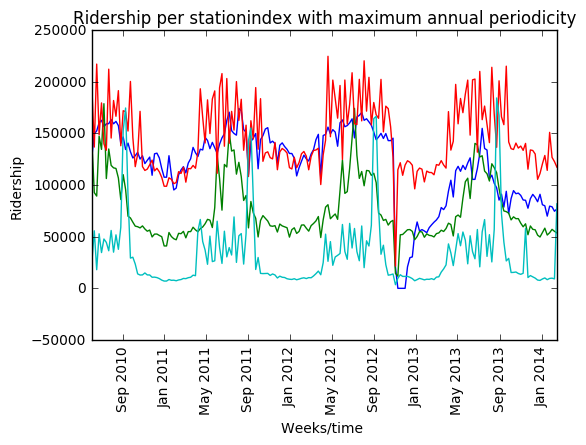

In [45]:
for i in stationindex[0]:
    plot(dates, mta_allsum[i])
    # plot formatting
pl.xticks(rotation=90)
pl.xlabel('Weeks/time ')
pl.ylabel('Ridership')
pl.title('Ridership per stationindex with maximum annual periodicity')

Weekly ridership for per station for the four stations with highest annual periodicity.
There is higher ridership during the summer when  there are more people commuting to recreational places which these 4 stations located!

Extra Credit

In [46]:
data = mtadata

# reshape
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T

# filter
tots = tots[tots.std(1)>0]

# normalize
vals = ((tots.T - tots.mean(1))/tots.std(1)).T


In [47]:
km = KMeans(10)
res = km.fit(vals)

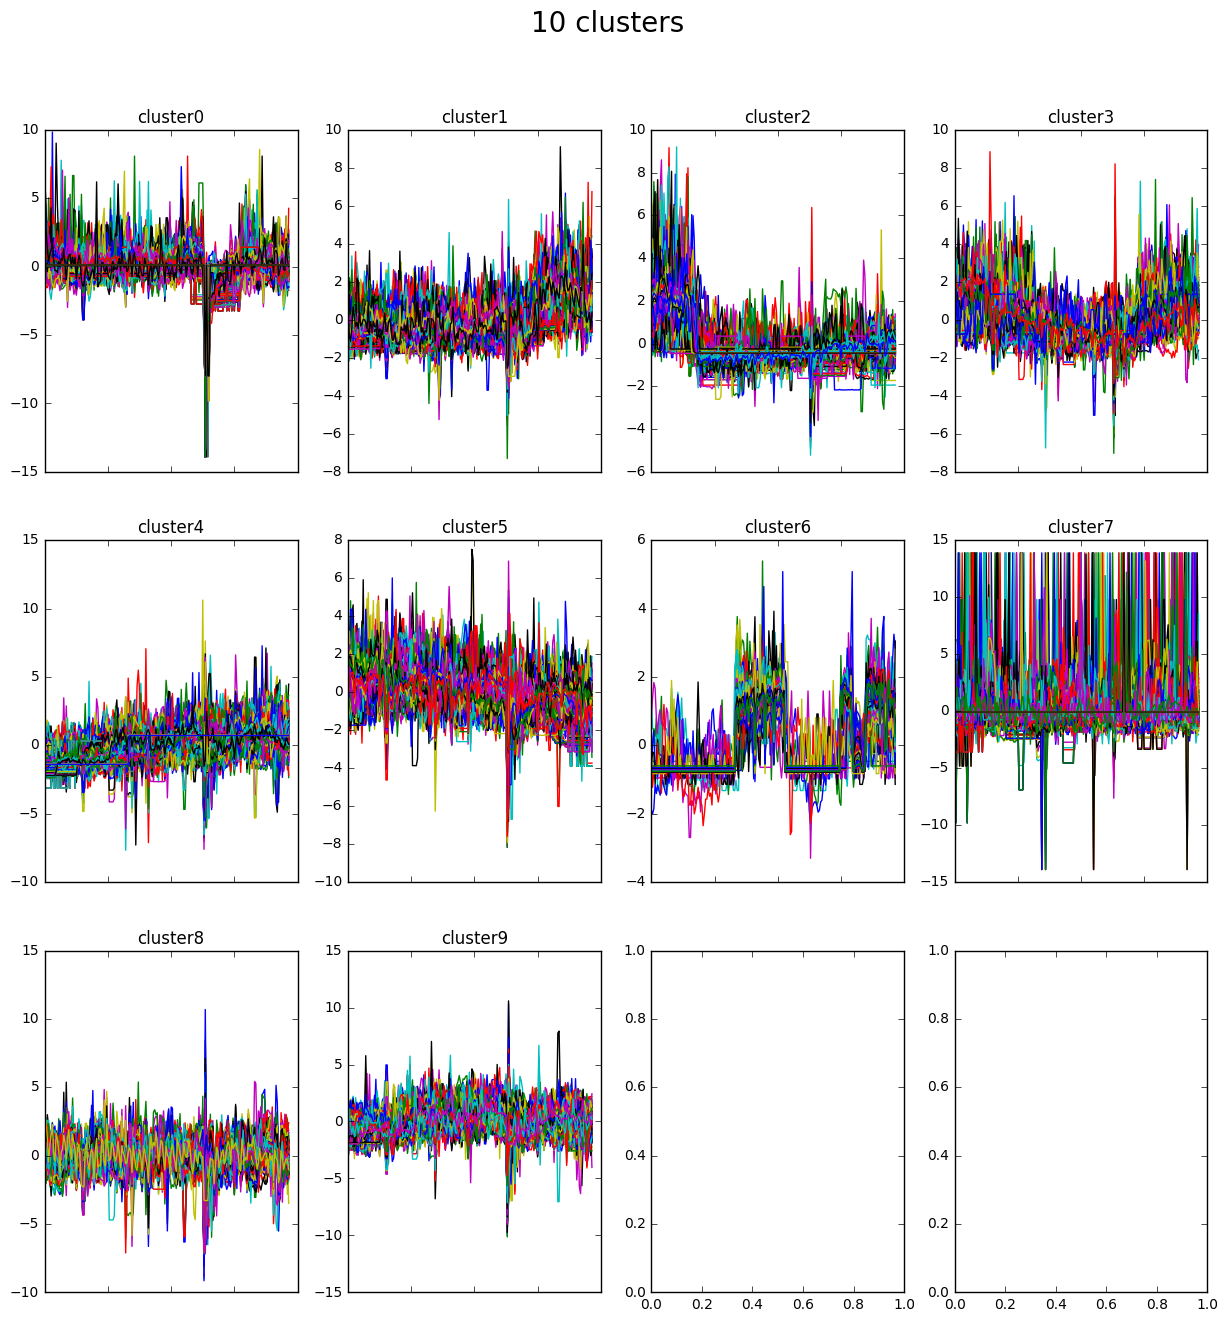

In [48]:
fig, axs = plt.subplots(3,4, figsize=(15, 15))
axs = axs.ravel()





for i in range(10):
    axs[i].plot(vals[np.where(res.labels_==i)].T)
    axs[i].set_title('cluster' + str(i), fontsize=12)
    plt.setp(axs[i].get_xticklabels(), visible=False)
plt.suptitle('10 clusters', fontsize=20)
plt.show()



## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)

## note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the no.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```


as opposed to just 

use the no.nansum etc
```
np.mean(mtarides)
np.sum(mtarides)
```

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

#i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

#removing empty light curves
```
tots = tots[tots.std(1)>0]
```

#with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

#and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

#then you can run:

```
km.fit(vals)
```

# HINTS: 


## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, dependingon the question) the appropriate dimension in different parts of the homework: when you need to work on the station level, collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average). The sum and average functions take an "axis" argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the dight axis.


# Possibly useful functions

I  used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft  
```
np.fft.rfft(mydata) 
```  

    will return the *real* part of the fourier transform (which is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math. All you need to know is that you need the real part). But what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the 
```
np.array.flatten()
np.array.reshape()
```
    array methods allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````



In [ ]:
#after reading the datacube you should see:
mtaRides.shape


ride types list

In [6]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [9]:
#after that I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

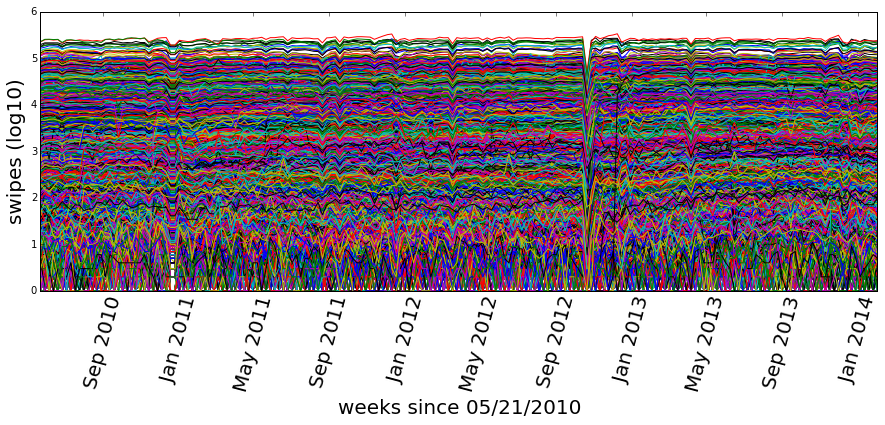

In [6]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mtaRide.shape)
mta_allsum = np.nansum(mtaRides, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)



(600, 23, 194)
(23, 194)
(600, 194)


## NOTE ON THE TREND DETECTION:
### you should find the *card type* that has the steepest increase, and the steepest decrease. Notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the flux near the beginning to the flux near the end of the time series.

### notice that you should inspect the time series, algorithmically or at least by eye, to ensure you see a trend, and not just changing structure. Below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

std: 153167.095823 
flux ratio beginning to end 1.53960256599
std: 33307.6081244 
flux ratio beginning to end 0.378670623705


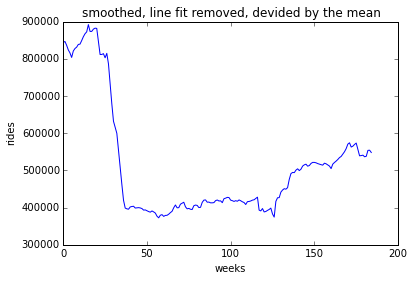

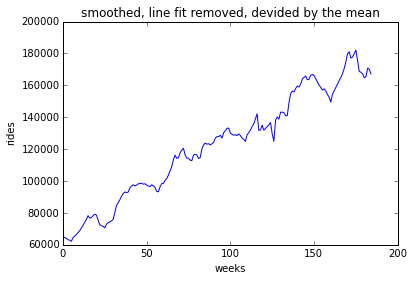

to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

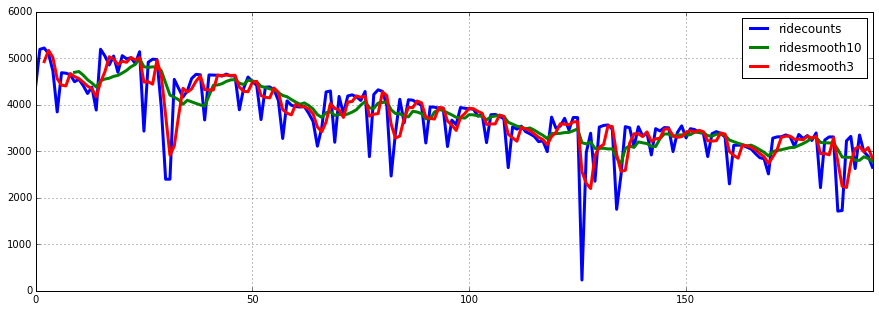

In [14]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

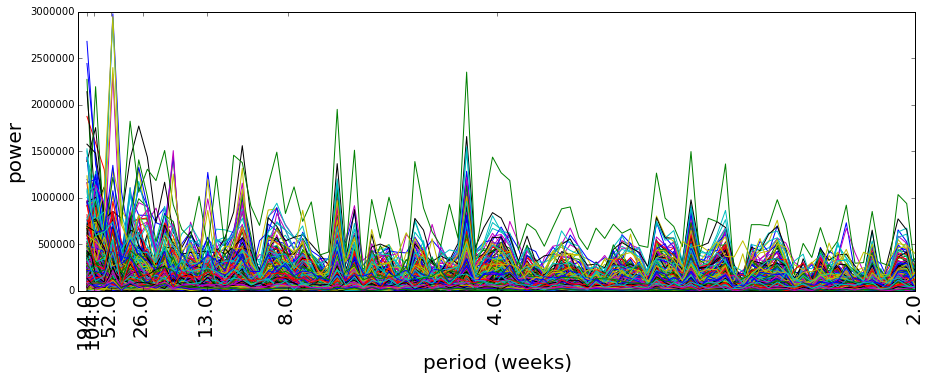

In [51]:
# this is a "power spectrum": the plot of the absolute value of the fourier transform. 
# I changed the xtick labels from frequecy (1/week) to period (in weeks)
# to facilitate the visual identification of the 1-year period peak
# (notice however that np.fft.rfftfreq(N, d)  returns frequency, the inverse of the period: frequency = 1/period. 
# All I did was changing the tick labels): 

...
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90)

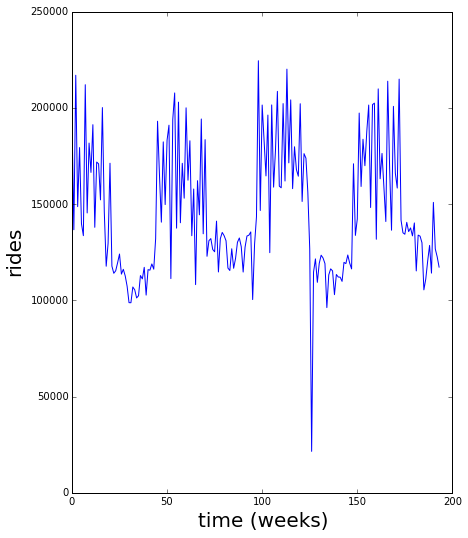

In [63]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space